# Agglomerative & DBSCAN Clustering Notebook
--------
We will use Mall Customers dataset called Mall_Customers.csv

We will only columns Annual Income & Spending Score to make things clearer in clustering, just like in KMeans.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering as Agglom
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

## Read Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df = df.drop(['CustomerID', 'Gender', 'Age'], axis='columns', errors='ignore')
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## Visualizing the Dataset

In [4]:
X1, X2 = df.iloc[:,0], df.iloc[:,1]
X1, X2 = df.iloc[:,0], df.iloc[:,1]
print(X1.shape, X2.shape)

(200,) (200,)


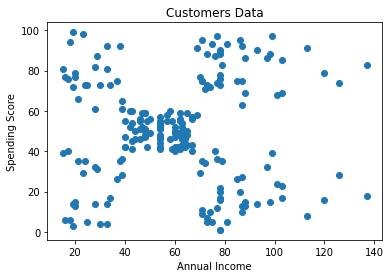

In [5]:
plt.scatter(X1, X2)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customers Data')
plt.show()

## Agglomerative Clustering

In [6]:
model = Agglom(n_clusters=5)
model = model.fit(df)
labels = model.fit_predict(df)
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int64)

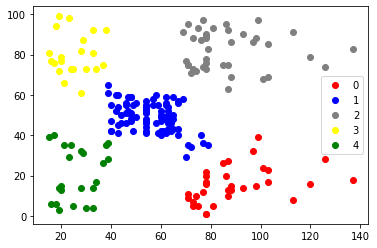

In [7]:
plt.scatter(X1[labels == 0], X2[labels == 0], color='red', label='0')
plt.scatter(X1[labels == 1], X2[labels == 1], color='blue', label='1')
plt.scatter(X1[labels == 2], X2[labels == 2], color='grey', label='2')
plt.scatter(X1[labels == 3], X2[labels == 3], color='yellow', label='3')
plt.scatter(X1[labels == 4], X2[labels == 4], color='green', label='4')
plt.legend()
plt.show()

### Calculating Sillhouette Score

In [8]:
sil_score = silhouette_score(df, labels)
print("Silhouette Score is: %.2f" % sil_score)

Silhouette Score is: 0.55


## DBSCAN

In [9]:
model = DBSCAN(eps=10, min_samples=2)
labels = model.fit_predict(df)
classes = np.unique(labels)
classes

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

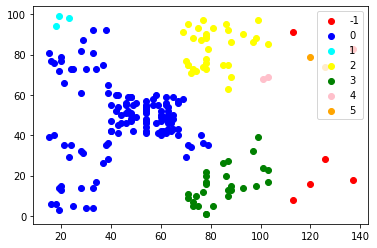

In [10]:
colors_list = ['red', 'blue', 'cyan', 'yellow', 'green', 'pink', 'orange', 'black']
for i, k_val in enumerate(classes):
    plt.scatter(X1[labels == k_val], X2[labels == k_val], color=colors_list[i], label=k_val)

plt.legend()
plt.show()

In [11]:
sil_score = silhouette_score(df, labels)
print("Silhouette Score is: %.2f" % sil_score)

Silhouette Score is: 0.32
